In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lurie = pd.read_csv('lurie_ebs.csv')
res = pd.read_csv('res.csv')

# Forgot to keep formatting consistent, doh!
def convert_id(df):
    ID = df['KICID']
    ID = int(ID[4:])
    return ID

res['KIC'] = res.apply(convert_id, axis=1)
    
res = res.merge(lurie, on='KIC', how='inner')

res

,KICID,window,dur1,dur2,ecosw,esinw,ecc,$a_1$,$t_1$,$\sigma_1$,$a_2$,$t_2$,$\sigma_2$,$P_{orb}$,KIC,Porb
0,KIC 1026032,51,0.268073,0.268968,-0.041605,0.001666,0.041638,7.813888e-02,2.261646,0.043374,2.914461e-02,-1.744531,0.043519,8.460535,1026032,8.460
1,KIC 1161345,11,0.109717,0.206453,-0.606665,0.305963,0.679453,5.603387e-04,-1.211772,0.017752,2.614183e-04,-0.659590,0.033404,4.852854,1161345,8.575
2,KIC 1575690,11,0.110020,0.102661,-0.000365,-0.034604,0.034606,3.049414e-02,0.795817,0.017801,1.946552e-02,-0.329874,0.016610,2.252427,1575690,2.252
3,KIC 2019076,101,0.191213,0.382443,0.575856,0.333352,0.665383,8.203892e-02,1.307499,0.030938,3.803049e-05,-1.781594,0.061879,3.564606,2019076,7.129
4,KIC 2162994,11,0.323291,0.336119,-0.000008,0.019454,0.019454,3.775766e-01,1.120131,0.052309,3.301335e-01,-0.930624,0.054384,4.101549,2162994,4.102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,KIC 12470530,21,0.222741,0.223573,-0.000069,0.001866,0.001867,3.965387e-01,4.313215,0.036039,3.925254e-01,-3.892852,0.036174,16.413578,12470530,8.207
626,KIC 12504988,51,0.265096,0.265745,-0.756502,0.001221,0.756503,1.887652e-06,-2.075267,0.042893,2.798100e-02,-1.981557,0.042998,5.094134,12504988,5.094
627,KIC 12506351,31,0.152882,0.331494,-0.055427,0.368748,0.372890,4.660497e-02,-0.257282,0.024736,1.882291e-10,0.313251,0.053636,1.227706,12506351,2.456
628,KIC 12557713,11,0.135615,0.112929,0.016325,-0.091277,0.092725,4.585336e-02,0.987386,0.021943,7.210219e-03,-2.694813,0.018272,7.214437,12557713,7.215


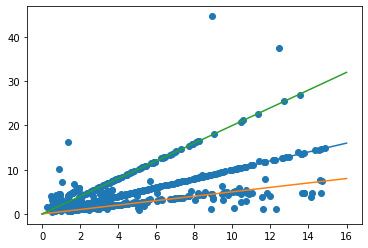

In [4]:
plt.scatter(res['Porb'], res['$P_{orb}$'])
x = np.linspace(0,16)
plt.plot(x, x)
plt.plot(x, 0.5*x)
plt.plot(x, 2*x)

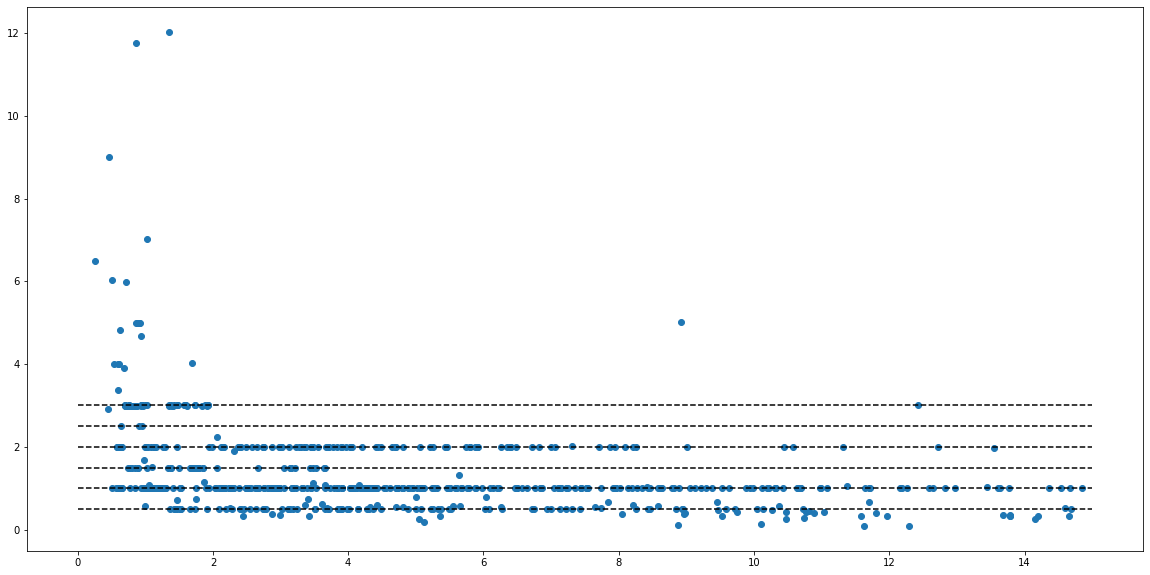

In [26]:
x = np.linspace(0,15)
fig,ax = plt.subplots(figsize=(20,10))
ax.scatter(res['Porb'], res['$P_{orb}$']/res['Porb'])
ax.hlines([0.5, 1, 1.5, 2, 2.5, 3], xmin=0, xmax=15, color='k', linestyle='--')
plt.savefig('porbcomparison.png')

In [6]:
n1 = len(res[abs(res['$P_{orb}$'] - res['Porb'])/res['Porb'] < 0.1])
print(f'Porb within 10%: {n1}, {100*n1/len(res):0.2f}%')
n2 = len(res[abs(2*res['$P_{orb}$'] - res['Porb'])/res['Porb'] < 0.1])
print(f'Twice Porb within 10%: {n2}, {100*n2/len(res):0.2f}%')
nhalf = len(res[abs(0.5*res['$P_{orb}$'] - res['Porb'])/res['Porb'] < 0.1])
print(f'Half Porb within 10%: {nhalf}, {100*nhalf/len(res):0.2f}%')
total = n1+n2+nhalf
print(f'Total: {total}, {100*total/len(res):0.2f}%')

Porb within 10%: 282, 44.76%
Twice Porb within 10%: 86, 13.65%
Half Porb within 10%: 101, 16.03%
Total: 469, 74.44%
